# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

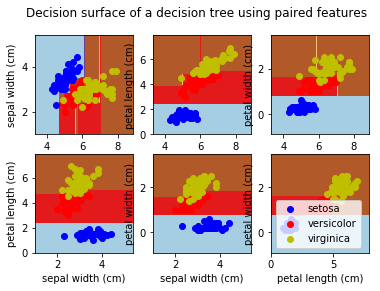

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show. The plot shows each pairs of features in the dataset with decision boundary

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

In [2]:
#Question 2:
from sklearn.model_selection import train_test_split

In [3]:
import timeit

In [4]:
X = iris.data[:,0:4]
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

In [27]:
start_time = timeit.default_timer()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

elapsed = timeit.default_timer() - start_time
print str(elapsed) + "s"

0.00102588163992s


In [28]:
clf.score(X_test, y_test)

0.93999999999999995

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test, clf.predict(X_test))

array([[13,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 19]])

In [22]:
# The accuracy on the training set is always 1.0...
clf.score(X_train,y_train)

1.0

In [28]:
#The accuracy is much better than KNN

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

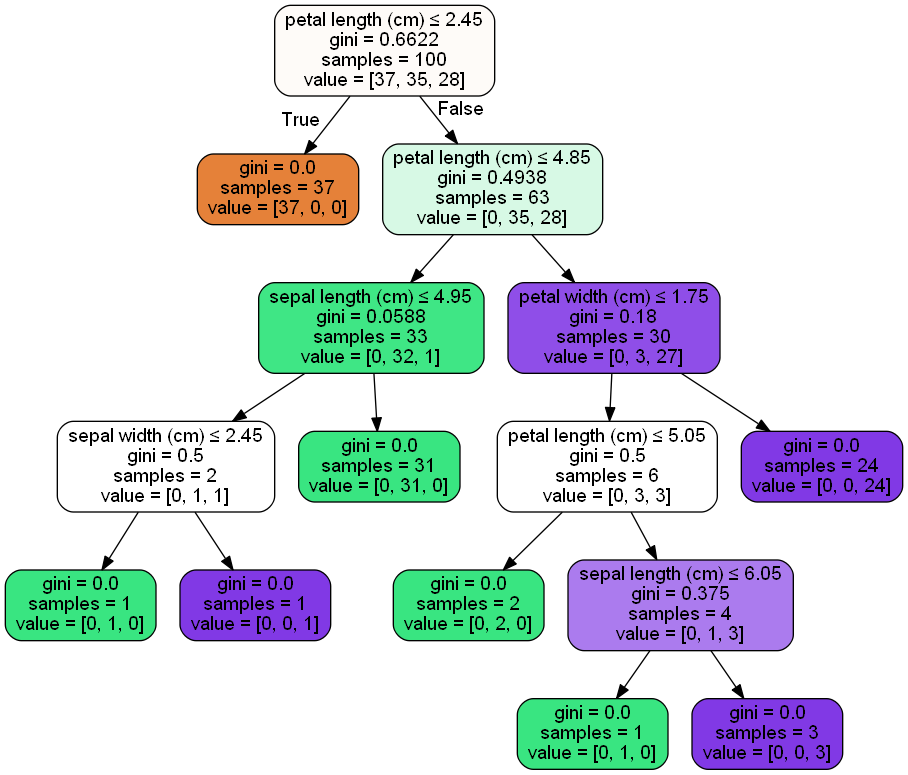

In [24]:

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = iris.feature_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())





In [29]:
from itertools import product
criterion = ['gini','entropy']
max_depth = [2,3,4]
min_samples_leaf = [1,5,15]
for combo in product(criterion, max_depth, min_samples_leaf):
    treecombo = DecisionTreeClassifier(criterion = combo[0], max_depth = combo[1], min_samples_leaf = combo[2])
    treecombo.fit(X_train, y_train)
    print 'The accuracy for criterion: '+ str(combo[0]) + ' with max_depth '+ str(combo[1]) + ' and  min_samples_leaf '+str(combo[2])+ ' is '+ str(treecombo.score(X_test, y_test))
    print confusion_matrix(y_test, treecombo.predict(X_test))


The accuracy for criterion: gini with max_depth 2 and  min_samples_leaf 1 is 0.94
[[13  0  0]
 [ 0 14  1]
 [ 0  2 20]]
The accuracy for criterion: gini with max_depth 2 and  min_samples_leaf 5 is 0.94
[[13  0  0]
 [ 0 14  1]
 [ 0  2 20]]
The accuracy for criterion: gini with max_depth 2 and  min_samples_leaf 15 is 0.94
[[13  0  0]
 [ 0 14  1]
 [ 0  2 20]]
The accuracy for criterion: gini with max_depth 3 and  min_samples_leaf 1 is 0.94
[[13  0  0]
 [ 0 15  0]
 [ 0  3 19]]
The accuracy for criterion: gini with max_depth 3 and  min_samples_leaf 5 is 0.94
[[13  0  0]
 [ 0 15  0]
 [ 0  3 19]]
The accuracy for criterion: gini with max_depth 3 and  min_samples_leaf 15 is 0.94
[[13  0  0]
 [ 0 14  1]
 [ 0  2 20]]
The accuracy for criterion: gini with max_depth 4 and  min_samples_leaf 1 is 0.94
[[13  0  0]
 [ 0 15  0]
 [ 0  3 19]]
The accuracy for criterion: gini with max_depth 4 and  min_samples_leaf 5 is 0.94
[[13  0  0]
 [ 0 15  0]
 [ 0  3 19]]
The accuracy for criterion: gini with max_dept

In [31]:
#Most combinations get the same accuracy

## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [33]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.



In [50]:
true = 'True.'
false = 'False.'
dfchurn['Churn?'].value_counts()
print 'The fraction is ' + str(float(483)/float((2850+483)))

The fraction is 0.144914491449


In [51]:
dftrue = dfchurn[dfchurn['Churn?'] == true]
dffalse = dfchurn[dfchurn['Churn?'] == false]

In [63]:
dfchurn.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

In [74]:
variables = pd.pivot_table(data = dfchurn, index = 'Churn?', values = dfchurn.columns)
variables

,Account Length,Area Code,CustServ Calls,Day Calls,Day Charge,Day Mins,Eve Calls,Eve Charge,Eve Mins,Intl Calls,Intl Charge,Intl Mins,Night Calls,Night Charge,Night Mins,VMail Message
Churn?,,,,,,,,,,,,,,,,
False.,100.793684,437.074737,1.449825,100.283158,29.780421,175.175754,100.038596,16.918909,199.043298,4.532982,2.743404,10.158877,100.058246,9.006074,200.133193,8.604561
True.,102.664596,437.817805,2.229814,101.335404,35.175921,206.914079,100.561077,18.054969,212.410145,4.163561,2.889545,10.700000,100.399586,9.235528,205.231677,5.115942


## There doesn't seem to be any significant differences between the mean of each variables between the two groups. But to make sure, let's conduct hypothesis test between each variables of the two groups

In [76]:
from scipy import stats

In [101]:
#Since the sample sizes are unequal, we use Welch's t-test
is_different = []
for variable in variables.columns:
    print variable
    result = stats.ttest_ind(dftrue[variable], dffalse[variable], equal_var = False)
    print result
    if result[1] < 0.01:
        print('We \033[49;32mreject\033[m the null hypothesis and conclude that there is a difference between the mean of '+ str(variable)+'of two groups')
        is_different.append(variable)
    else: 
        print ('We \033[49;31mfail to reject\033[m the null hypothesis that there is any difference')
    print " "

Account Length
Ttest_indResult(statistic=0.9618893197561772, pvalue=0.33645751767927445)
We fail to reject the null hypothesis that there is any difference
 
Area Code
Ttest_indResult(statistic=0.3534711187781604, pvalue=0.72384955766653691)
We fail to reject the null hypothesis that there is any difference
 
CustServ Calls
Ttest_indResult(statistic=8.9551413824433794, pvalue=5.2700403857172152e-18)
We reject the null hypothesis and conclude that there is a difference between the mean of CustServ Callsof two groups
 
Day Calls
Ttest_indResult(statistic=1.0023867230811039, pvalue=0.31654343135862301)
We fail to reject the null hypothesis that there is any difference
 
Day Charge
Ttest_indResult(statistic=9.684475930233658, pvalue=1.2198763860802676e-20)
We reject the null hypothesis and conclude that there is a difference between the mean of Day Chargeof two groups
 
Day Mins
Ttest_indResult(statistic=9.684562957319736, pvalue=1.2189683063650911e-20)
We reject the null hypothesis and co

There are differences between the following variables of the two groups:

In [102]:
is_different

['CustServ Calls',
 'Day Charge',
 'Day Mins',
 'Eve Charge',
 'Eve Mins',
 'Intl Calls',
 'Intl Charge',
 'Intl Mins',
 'VMail Message']

## Something is 'fishy' here... the sample means for some variables such as 'Night Charge' or 'Intl Mins' are not that different, and yet somehow the test rejected the null hypothesis for them. Let's check their standard deviations

In [87]:
for i in is_different:
    print i
    print dftrue[i].mean()
    print dffalse[i].mean()
    #if abs(dftrue[i].mean()-dffalse[i].mean()<1):
    print dftrue[i].std()
    print dffalse[i].std()
    print " "

CustServ Calls
2.2298136646
1.4498245614
1.85327493198
1.16388332699
 
Day Charge
35.1759213251
29.7804210526
11.7297098818
8.53083546326
 
Day Mins
206.914078675
175.175754386
68.9977915376
50.1816551829
 
Eve Charge
18.0549689441
16.9189087719
4.39676226466
4.27486270457
 
Eve Mins
212.410144928
199.043298246
51.7289095534
50.29217462
 
Intl Calls
4.1635610766
4.53298245614
2.55157533105
2.44198387385
 
Intl Charge
2.88954451346
2.74340350877
0.754152130047
0.751784348902
 
Intl Mins
10.7
10.158877193
2.79318970242
2.78448923076
 
Night Charge
9.23552795031
9.00607368421
2.12108058872
2.29976753175
 
Night Mins
205.231677019
200.133192982
47.1328247043
51.1050323483
 
VMail Message
5.11594202899
8.60456140351
11.8601381992
13.9131253916
 


## Some variables have very big standard deviations and yet the means are nearly equal, but for some reason they ended up in the list rejected by the Welch T-Test...? I'm guessing this is because of the difference between the two sample sizes?????

Now, let's compare the categorical variables

In [111]:
dfchurn.columns
print dfchurn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object


In [122]:
category = ['State','Int\'l Plan', 'VMail Plan']
for var in category:
    print pd.crosstab(dfchurn['Churn?'], dfchurn[var] )
    print ""

State   AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  \
Churn?                                         ...                           
False.  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65   
True.    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8   

State   WA  WI  WV  WY  
Churn?                  
False.  52  71  96  68  
True.   14   7  10   9  

[2 rows x 51 columns]

Int'l Plan    no  yes
Churn?               
False.      2664  186
True.        346  137

VMail Plan    no  yes
Churn?               
False.      2008  842
True.        403   80



In [126]:
from __future__ import division

In [128]:
statechurn = pd.crosstab(dfchurn['Churn?'], dfchurn['State']).T
statechurn['Percent Churn'] = statechurn['True.']/statechurn['False.']*100
statechurn.head()

Churn?,False.,True.,Percent Churn
State,,,
AK,49,3,6.122449
AL,72,8,11.111111
AR,44,11,25.000000
AZ,60,4,6.666667
CA,25,9,36.000000


In [132]:
print statechurn['Percent Churn'].max()

36.0


In [138]:
statechurn.sort_values(['Percent Churn'],ascending = False).head()

Churn?,False.,True.,Percent Churn
State,,,
NJ,50,18,36.000000
CA,25,9,36.000000
TX,54,18,33.333333
MD,53,17,32.075472
SC,46,14,30.434783


In [186]:
statechurn.sort_values(['Percent Churn'],ascending = False).tail()

Churn?,False.,True.,Percent Churn
State,,,
IA,41,3,7.317073
VA,72,5,6.944444
AZ,60,4,6.666667
AK,49,3,6.122449
HI,50,3,6.000000


In [185]:
import seaborn as sns
from matplotlib import pyplot as plt

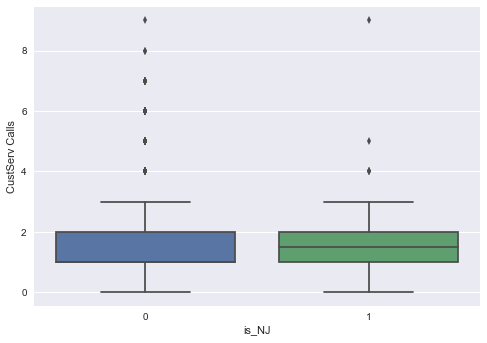

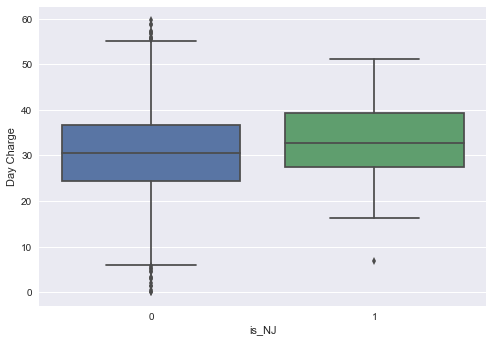

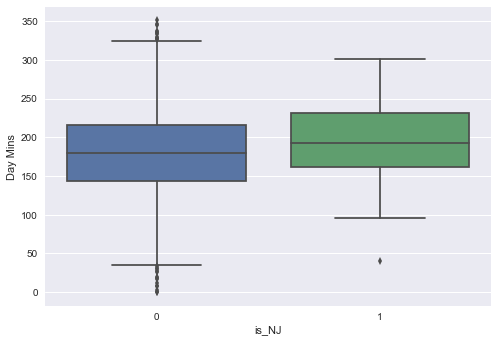

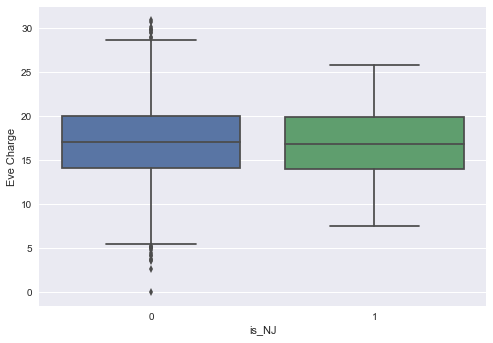

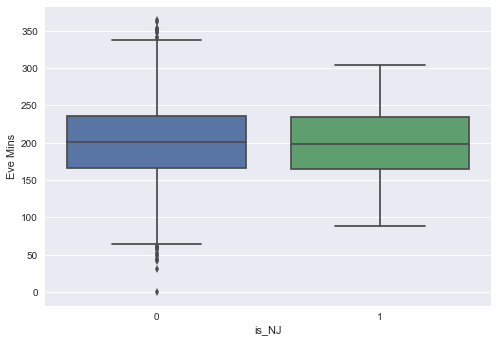

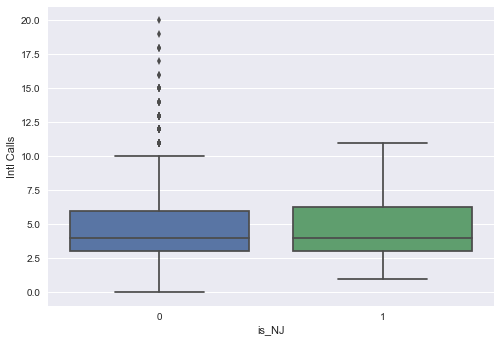

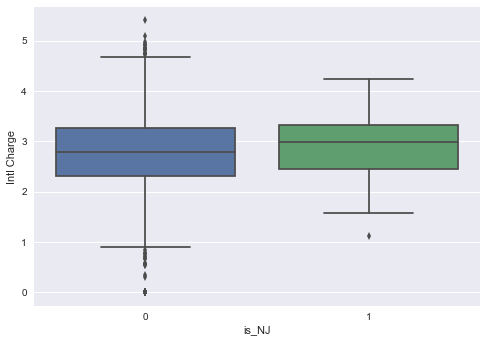

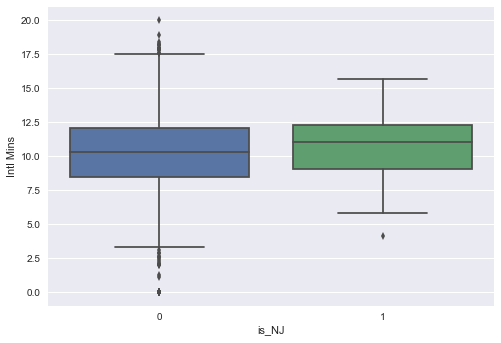

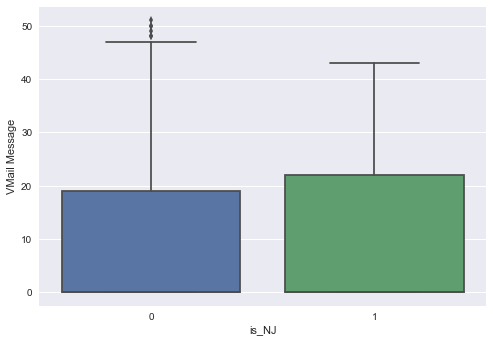

In [203]:
dfchurn['is_NJ'] = 0
dfchurn.loc[dfchurn['State'] == 'NJ', 'is_NJ'] = 1
for var in is_different:
    sns.boxplot(data = dfchurn, x = 'is_NJ', y = dfchurn[var])
    plt.show()

So New Jersey and California have the highest churn rates


**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

In [141]:
dfchurn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [142]:
dfchurn.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

In [148]:
category

['State', "Int'l Plan", 'VMail Plan']

If we create dummy variables for State, then there would be way too many of them. So although I think state does play an important role, it is better to just skip the variable to avoid overfit

In [165]:
df = dfchurn.drop(['State','Account Length','Area Code','Phone'], axis = 1)

In [166]:
Int_Plan = pd.get_dummies(df[category[1]])
Int_Plan.columns = ['IPlan_No','IPlan_Yes']
VMail = pd.get_dummies(df[category[2]])
VMail.columns = ['VMail_No','VMail_Yes']
df = pd.concat([df, Int_Plan, VMail], axis=1)

In [168]:
df.drop([category[1],category[2]], axis = 1, inplace = True)
df.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,IPlan_No,IPlan_Yes,VMail_No,VMail_Yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,1,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0,1,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0,1,1,0


In [174]:
from sklearn import neighbors

In [177]:

k = 20   

y = df['Churn?']
X = df.drop(['Churn?'], axis = 1)


h = .02 



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1000/df.shape[0])
#from sklearn.neighbors import KNeighborsClassifier

predictor = neighbors.KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
predictor.fit(X_train, y_train);
print predictor
accuracy = predictor.score(X_test,y_test)
print accuracy


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')
0.873


So we get 87.3% accuracy, not too bad at all

In [178]:
confusion_matrix(y_test, predictor.predict(X_test))

array([[844,   5],
       [122,  29]])

**Question 6**. Train and test a decision tree. Do it on the sane traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.


In [183]:
max_depth = [2,3,4,5,10]
for combo in product(criterion, max_depth, min_samples_leaf):
    treecombo = DecisionTreeClassifier(criterion = combo[0], max_depth = combo[1], min_samples_leaf = combo[2])
    treecombo.fit(X_train, y_train)
    print 'The accuracy for criterion: '+ str(combo[0]) + ' with max_depth '+ str(combo[1]) + ' and  min_samples_leaf '+str(combo[2])+ ' is '+ str(treecombo.score(X_test, y_test))
    print confusion_matrix(y_test, treecombo.predict(X_test))

The accuracy for criterion: gini with max_depth 2 and  min_samples_leaf 1 is 0.88
[[839  10]
 [110  41]]
The accuracy for criterion: gini with max_depth 2 and  min_samples_leaf 5 is 0.88
[[839  10]
 [110  41]]
The accuracy for criterion: gini with max_depth 2 and  min_samples_leaf 15 is 0.88
[[839  10]
 [110  41]]
The accuracy for criterion: gini with max_depth 3 and  min_samples_leaf 1 is 0.909
[[844   5]
 [ 86  65]]
The accuracy for criterion: gini with max_depth 3 and  min_samples_leaf 5 is 0.909
[[844   5]
 [ 86  65]]
The accuracy for criterion: gini with max_depth 3 and  min_samples_leaf 15 is 0.91
[[845   4]
 [ 86  65]]
The accuracy for criterion: gini with max_depth 4 and  min_samples_leaf 1 is 0.925
[[838  11]
 [ 64  87]]
The accuracy for criterion: gini with max_depth 4 and  min_samples_leaf 5 is 0.926
[[839  10]
 [ 64  87]]
The accuracy for criterion: gini with max_depth 4 and  min_samples_leaf 15 is 0.927
[[839  10]
 [ 63  88]]
The accuracy for criterion: gini with max_depth

Generally, we get a more accurate result with decision tree. As can be seen, it can reach 95% accuracy


**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try try to prevent churn. The cost of each contact is \$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

The best accuracy I got is 0.956. Thus, the expected value would be:


In [184]:
print 30*121 - 10*16

3470
